<a href="https://colab.research.google.com/github/yashasangani/DeepLearning-6th-July/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Load MNIST dataset

In [2]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

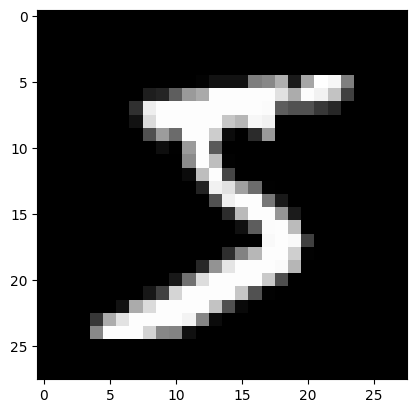

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap ='gray')

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
ytest.shape

(10000,)

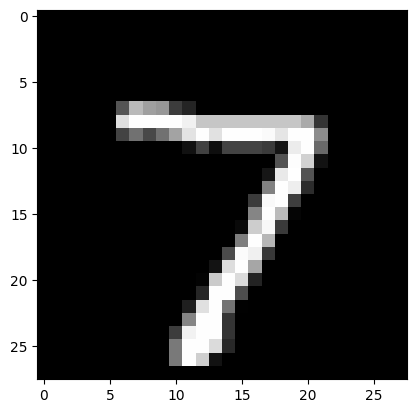

In [9]:
plt.imshow(xtest[0],cmap='gray')

## Displaying first 9 images from train data

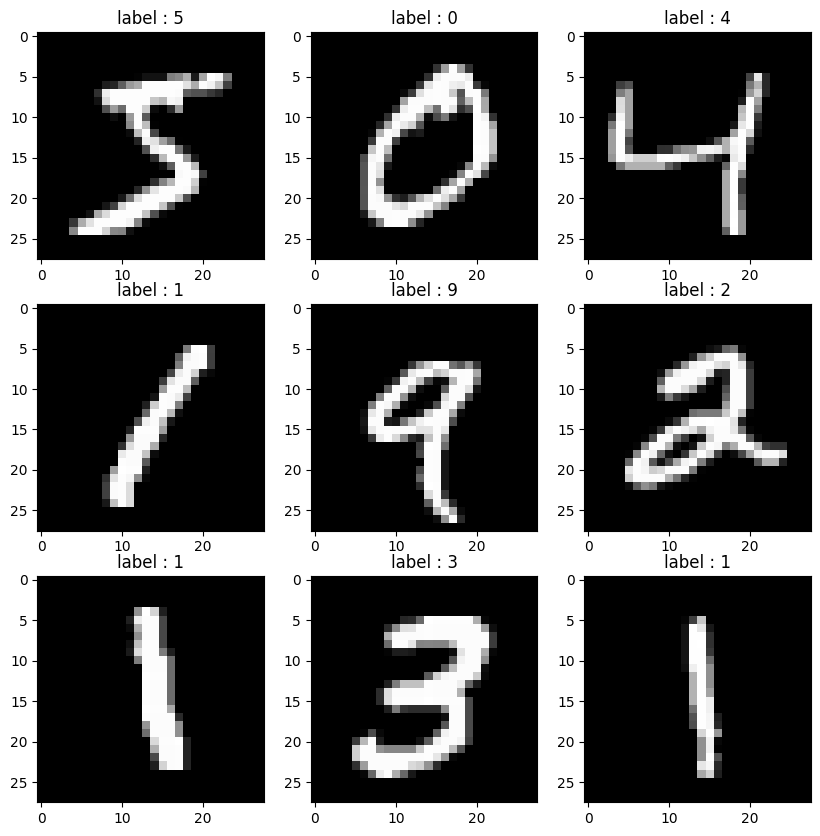

In [10]:
plt.figure(figsize =(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f"label : {ytrain[i]}")

In [11]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
len(np.unique(ytrain))

10

### This is a multiclass classification problem

### Preprocess image data
Pixel value 0-255

In [13]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [14]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### one hot encode the y features

In [15]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [16]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
xtrain.shape

(60000, 28, 28)

### Build the neural network
Simple Covnet architecture

In [21]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D,Flatten,Dense, Dropout

In [22]:
model = Sequential()

#added input layer
model.add(Input(shape=(28,28,1)))

# Add Convolution layer
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))

#Add Max Pooling1
model.add(MaxPooling2D(pool_size=(2,2)))

# Add concolution layer
model.add(Conv2D(filters=64, kernel_size = (3,3),activation= 'relu'))

# MAx pooling 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add flatten layer
model.add(Flatten())

# Add Dropout layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(ytrain_cat.shape[1],activation = 'softmax'))



In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [24]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
hist = model.fit(xtrain_scl,ytrain_cat,epochs = 15,validation_split = 0.1)

Epoch 1/15
1688/1688 [==============================] - 19s 7ms/step - loss: 0.2228 - accuracy: 0.9316 - val_loss: 0.0558 - val_accuracy: 0.9857
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0842 - accuracy: 0.9739 - val_loss: 0.0425 - val_accuracy: 0.9872
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0374 - val_accuracy: 0.9885
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.0438 - val_accuracy: 0.9868
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0478 - accuracy: 0.9848 - val_loss: 0.0325 - val_accuracy: 0.9907
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0353 - val_accuracy: 0.9917
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0306 - val_accuracy

### Plot the learning curve

<function matplotlib.pyplot.show(close=None, block=None)>

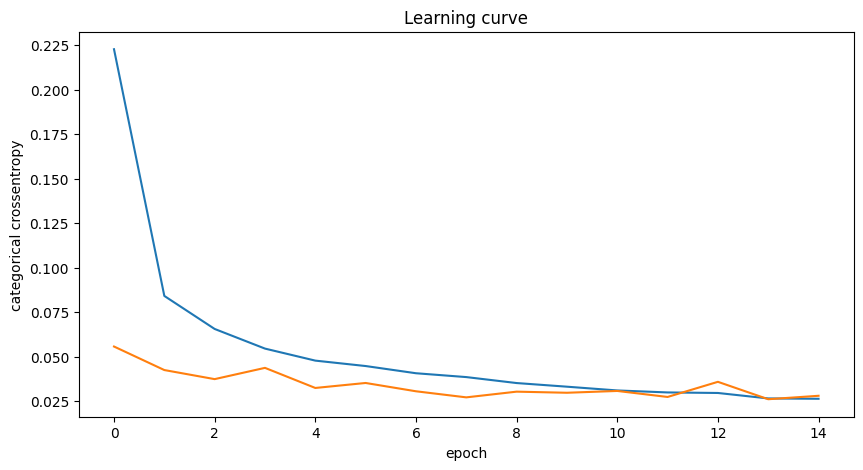

In [26]:
plt.figure(figsize = (10,5))
plt.plot(hist.history['loss'],label = 'Train loss')
plt.plot(hist.history['val_loss'],label = 'Validation loss')
plt.title('Learning curve')
plt.ylabel('categorical crossentropy')
plt.xlabel('epoch')
plt.show

## Evaluate the model in train and test

In [27]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - accuracy: 0.9968


[0.01041818130761385, 0.9968166947364807]

In [28]:
model.evaluate(xtest_scl,ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0241 - accuracy: 0.9925


[0.02411578595638275, 0.9925000071525574]

### Predict results for train and test

In [29]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [30]:
yprob_train[0:5]

array([[2.0212712e-11, 4.3975765e-14, 3.1740523e-11, 1.0870501e-03,
        1.9849275e-14, 9.9891031e-01, 3.3510720e-12, 1.1437018e-08,
        1.8176721e-06, 8.1496717e-07],
       [9.9999976e-01, 3.5123770e-17, 1.8011205e-08, 5.5366432e-13,
        2.2074155e-11, 1.6448097e-12, 6.7041370e-08, 2.4781007e-13,
        5.9961877e-08, 2.6952804e-08],
       [2.4173501e-15, 2.3396844e-08, 1.8569581e-10, 7.1005545e-12,
        9.9999678e-01, 1.2913725e-11, 7.4405185e-13, 2.4357100e-06,
        1.0800833e-08, 7.9220240e-07],
       [1.3663566e-08, 9.9997234e-01, 1.2878999e-07, 3.6345333e-11,
        7.9720294e-06, 2.3553448e-10, 1.2009448e-07, 1.4195449e-05,
        5.1880916e-06, 8.0208533e-09],
       [2.0242044e-12, 8.3404131e-11, 4.8077214e-10, 3.6157051e-09,
        2.7691611e-05, 2.4049522e-09, 6.5338275e-15, 3.9362175e-07,
        1.5987393e-05, 9.9995589e-01]], dtype=float32)

In [31]:
import numpy as np
ypred_train = np.argmax(yprob_train,axis =1)
ypred_test = np.argmax(yprob_test,axis = 1)

In [32]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [33]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [34]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [35]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion matrix

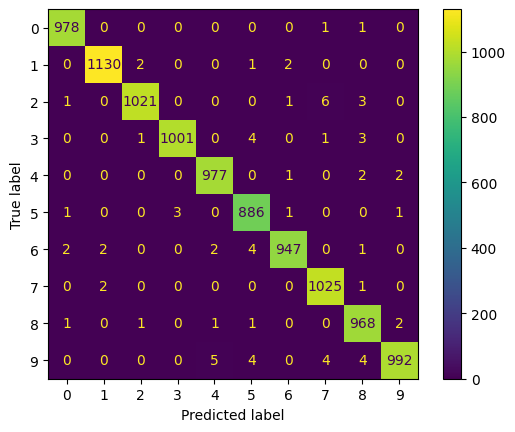

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Save above model for future use

In [38]:
model.save('Digit_Model.keras')

### Load above model

In [39]:
from keras.models import load_model
nn = load_model('/content/Digit_Model.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [40]:
# Loading the image

import cv2
img = cv2.imread('/example_img.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [41]:
img_scl = img.astype("float32")/255
img_scl

array([[0.00392157, 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.00784314, 0.        , 0.00784314, 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.00784314,
        0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.00784314, 0.        , 0.00392157, 0.        , 0.01176471,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.00784314,
        0.00784314, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.00392157, 0.00784314, 0.00392157, 0.00392157, 0.        ,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.01960784, 0.0078

In [42]:
probs = model.predict(np.array([img_scl]))

1/1 [==============================] - 0s 116ms/step


In [43]:
probs

array([[7.5125170e-20, 5.0672722e-19, 4.3625238e-16, 9.9999821e-01,
        1.3129818e-19, 1.7630229e-06, 1.8496660e-20, 2.5442373e-14,
        1.0895010e-12, 1.5053988e-11]], dtype=float32)

In [45]:
pred = np.argmax(probs,axis = 1)
pred

array([3])

In [46]:
prob = np.max(probs)
prob

0.9999982

In [47]:
def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob

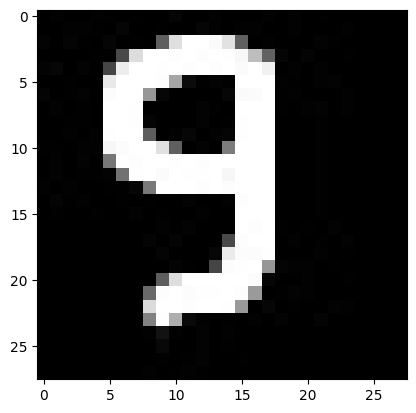

1/1 [==============================] - 0s 64ms/step


(4, 0.99757665)

In [50]:
predict_number('/example_img3.jpg')

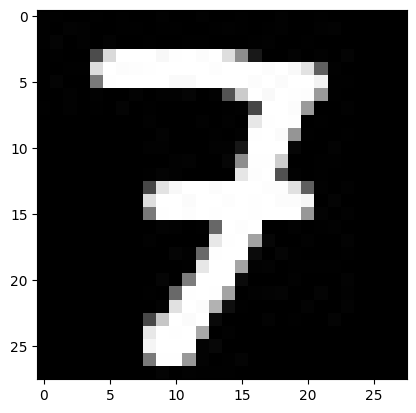

1/1 [==============================] - 0s 29ms/step


(7, 0.999902)

In [51]:
predict_number('/example_img2.jpg')